In [43]:
#loading in respective imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(style="darkgrid")

In [49]:
hourlySingleValueData = pd.read_excel("../optimizationModel/modelOutputs/testRun.xlsx",sheet_name="hourlyValueDvs")

hourlyEyValueData = pd.read_excel("../optimizationModel/modelOutputs/testRun.xlsx",sheet_name="hourlyEyValueDvs",usecols="B")


combinedDf = pd.concat([hourlySingleValueData, hourlyEyValueData.rename(columns={0: "eyGen"})], axis=1, join='inner')

#cleaning up combined data and adding new column for data analysis purposes
del combinedDf["Unnamed: 0"]
combinedDf["eyDirectToHb"] = combinedDf["eyGen"] - (combinedDf["hsStore"]/.9)

combinedDf.head()

,windGen,solarGen,asuGen,hbGen,hsStore,bsStore,hsAvail,bsAvail,hsDeploy,bsDeploy,timestep,eyGen,eyDirectToHb
0,6.448230e+06,0.0,6563.325707,7974.879352,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1,1411.553645,1411.553645
1,6.632465e+06,0.0,6750.844298,8202.726972,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2,1451.882674,1451.882674
2,6.878112e+06,0.0,6952.601011,8447.874861,0.0,45535.776067,2.867737e-13,45535.776067,0.000000e+00,0.000000,3,1495.273850,1495.273850
3,6.878112e+06,0.0,6952.601011,8447.874861,0.0,45535.776067,1.628001e-13,91071.552134,0.000000e+00,0.000000,4,1495.273850,1495.273850
4,6.755288e+06,0.0,6919.471880,8407.620753,0.0,0.000000,8.140005e-14,45535.776067,7.326005e-14,44169.702785,5,1488.148873,1488.148873


Text(0, 0.5, 'Generation/charge (MWh)')

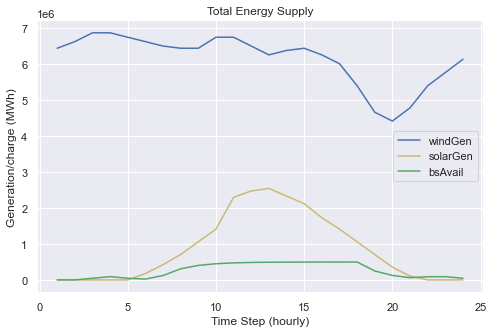

In [53]:
combinedDf.plot(x="timestep", y=["windGen","solarGen","bsAvail"],
                style=['b','y','g'],figsize=(8, 5))
plt.title("Total Energy Supply")
plt.xlabel("Time Step (hourly)")
plt.ylabel("Generation/charge (MWh)")

Text(0, 0.5, 'Power (MWh)')

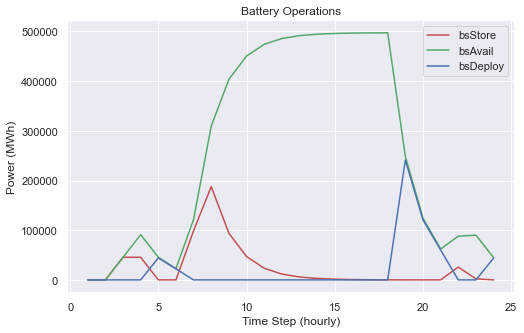

In [46]:
combinedDf.plot(x="timestep", y=["bsStore","bsAvail","bsDeploy"],
                style=['r','g','b'],figsize=(8, 5))
plt.title("Battery Operations")
plt.xlabel("Time Step (hourly)")
plt.ylabel("Power (MWh)")

Text(0, 0.5, 'Hydrogen (kg)')

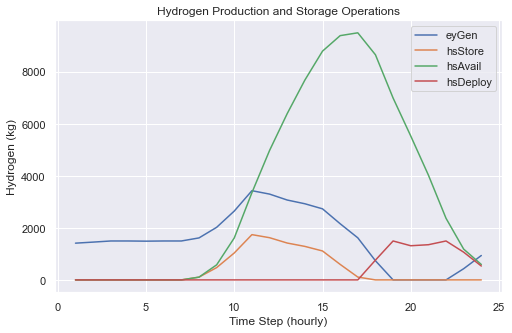

In [50]:
combinedDf.plot(x="timestep", y=["eyGen","hsStore","hsAvail","hsDeploy"],
                figsize=(8, 5))
plt.title("Hydrogen Production and Storage Operations")
plt.xlabel("Time Step (hourly)")
plt.ylabel("Hydrogen (kg)")

Text(0, 0.5, 'Production of chemical (kg)')

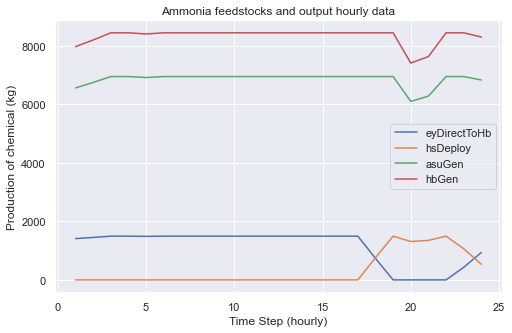

In [55]:
combinedDf.plot(x="timestep", y=["eyDirectToHb","hsDeploy","asuGen","hbGen"],
                figsize=(8, 5))
plt.title("Ammonia feedstocks and output hourly data")
plt.xlabel("Time Step (hourly)")
plt.ylabel("Chemical Production(kg)")